<a href="https://colab.research.google.com/github/shubhankar77/EDA/blob/main/instagrammers_simple_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import missingno as msno
plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
def plot_bar_for_vc(vc_object, xlabel, ylabel, title, rot=0):
    plt.bar(
    x=vc_object.index,
    height=vc_object.values)
    for index,value in vc_object.items():
        plt.text(x=index , y =value , s=f"{round(value*100, 2)} %" , fontdict=dict(fontsize=9))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = rot)
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/top_200_instagrammers.csv')

In [ ]:
data.head()

,Username,Channel Name,Country,Url,Main topic,Main video category,Likes,Likes Avg.,Posts,Followers,Boost Index,Comments Avg.,Views Avg.,Avg. 1 Day,Avg. 3 Day,Avg. 7 Day,Avg. 14 Day,Avg. 30 Day,Engagement Rate,Engagement Rate (60 Days)
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


In [ ]:
data.shape

(200, 20)

In [ ]:
data.columns

Index(['Username', 'Channel Name', 'Country', 'Url', 'Main topic',
       'Main video category', 'Likes', 'Likes Avg.', 'Posts', 'Followers',
       'Boost Index', 'Comments Avg.', 'Views Avg.', 'Avg. 1 Day',
       'Avg. 3 Day', 'Avg. 7 Day', 'Avg. 14 Day', 'Avg. 30 Day',
       'Engagement Rate', 'Engagement Rate (60 Days)'],
      dtype='object')

In [ ]:
data.columns = [val.lower().replace(" ", "_").replace("(", "").replace(")", "") for val in data.columns ]

In [ ]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   username                 200 non-null    object 
 1   channel_name             200 non-null    object 
 2   country                  138 non-null    object 
 3   url                      200 non-null    object 
 4   main_topic               130 non-null    object 
 5   main_video_category      133 non-null    object 
 6   likes                    200 non-null    float64
 7   likes_avg.               200 non-null    float64
 8   posts                    200 non-null    int64  
 9   followers                200 non-null    int64  
 10  boost_index              200 non-null    int64  
 11  comments_avg.            200 non-null    float64
 12  views_avg.               197 non-null    float64
 13  avg._1_day               61 non-null     float64
 14  avg._3_day               1

None

What is in the features ?

1. Username: Name of the influencer's account
2. Channel name: Name of the Channel
3. Country: Influencer's country
4. Url: Instagram Url
5. Main Topic: Main topic of the page
6. Main Video Category: Category of the reels and video
7. Like: Total Likes count
8. Likes Avg. : Average likes
9. Post: Total Posts
10. Followers: Total number of the followers
11. Boost Index: Boost index value
12. Comments Avg.: Average comments number. 
13. Views Avg: Average Views. 
14. Avg. 1 Day: Average views perday
15. Avg. 3 Day: Average views for 3 days
16. Avg. 7 Day: Average views for 7 days
17. Avg. 14 Day: Average views for 14 days
18. Avg. 30 Day: Average views for 30 days
19. Engagement Rate: Percentage of Engagement with users. 
20. Engagement Rate (60 Days): Percentage of Engagement with users for 60days


### Exploratory Data Analysis

In [ ]:
data.head()

,username,channel_name,country,url,main_topic,main_video_category,likes,likes_avg.,posts,followers,boost_index,comments_avg.,views_avg.,avg._1_day,avg._3_day,avg._7_day,avg._14_day,avg._30_day,engagement_rate,engagement_rate_60_days
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


### 1. Username

In [ ]:
data.username.unique()

array(['cristiano', 'kyliejenner', 'leomessi', 'selenagomez', 'therock',
       'kimkardashian', 'arianagrande', 'beyonce', 'khloekardashian',
       'kendalljenner', 'justinbieber', 'natgeo', 'nike', 'taylorswift',
       'jlo', 'virat.kohli', 'nickiminaj', 'kourtneykardash',
       'mileycyrus', 'neymarjr', 'katyperry', 'kevinhart4real', 'zendaya',
       'iamcardib', 'ddlovato', 'badgalriri', 'kingjames', 'theellenshow',
       'realmadrid', 'champagnepapi', 'chrisbrownofficial', 'fcbarcelona',
       'billieeilish', 'dualipa', 'gal_gadot', 'vindiesel',
       'priyankachopra', 'lalalalisa_m', 'nasa', 'shakira', 'gigihadid',
       'snoopdogg', 'davidbeckham', 'shraddhakapoor', 'victoriassecret',
       'k.mbappe', 'nehakakkar', 'shawnmendes', 'nba', 'narendramodi',
       'jennierubyjane', 'deepikapadukone', 'tomholland2013',
       'aliaabhatt', 'ronaldinho', 'emmawatson', 'bts.bighitofficial',
       'katrinakaif', 'justintimberlake', 'marvel', 'camila_cabello',
       'willsmith

In [ ]:
len(data.username.unique())

200

In [ ]:
data.describe()

,likes,likes_avg.,posts,followers,boost_index,comments_avg.,views_avg.,avg._1_day,avg._3_day,avg._7_day,avg._14_day,avg._30_day,engagement_rate,engagement_rate_60_days
count,2.000000e+02,2.000000e+02,200.000000,2.000000e+02,200.000000,200.000000,1.970000e+02,6.100000e+01,1.250000e+02,1.620000e+02,1.860000e+02,1.950000e+02,200.000000,2.000000e+02
mean,2.872531e+09,1.794036e+06,3894.685000,7.624449e+07,81.835000,9657.213702,4.122729e+06,2.201832e+05,6.969034e+05,1.078521e+06,1.180878e+06,1.243577e+06,0.023890,2.144167e-02
std,4.270441e+09,2.196261e+06,7554.327506,7.183988e+07,8.877603,12881.941966,4.000589e+06,4.167407e+05,1.201042e+06,1.871746e+06,1.915094e+06,1.919040e+06,0.040163,3.681096e-02
min,1.009315e+07,6.724715e+04,16.000000,3.281203e+07,22.000000,0.176471,3.581595e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.001092,4.971187e-09
25%,8.314277e+08,5.155011e+05,931.750000,3.956486e+07,80.000000,2533.300093,1.499868e+06,2.826400e+04,6.848800e+04,1.259690e+05,1.562158e+05,2.105310e+05,0.007584,4.442544e-03
50%,1.668507e+09,1.120528e+06,2084.500000,4.973707e+07,84.000000,5344.109682,2.896416e+06,8.393733e+04,2.302396e+05,3.748735e+05,4.515066e+05,5.394430e+05,0.014105,1.031813e-02
75%,3.225456e+09,2.106021e+06,4990.250000,6.814704e+07,86.000000,10124.004020,5.690915e+06,2.160880e+05,8.141800e+05,1.054254e+06,1.143059e+06,1.422887e+06,0.024342,2.192624e-02
max,4.304855e+10,1.553868e+07,99022.000000,4.650272e+08,93.000000,69133.050000,2.478636e+07,2.888035e+06,6.702150e+06,1.300787e+07,1.314321e+07,1.321100e+07,0.345696,2.987771e-01


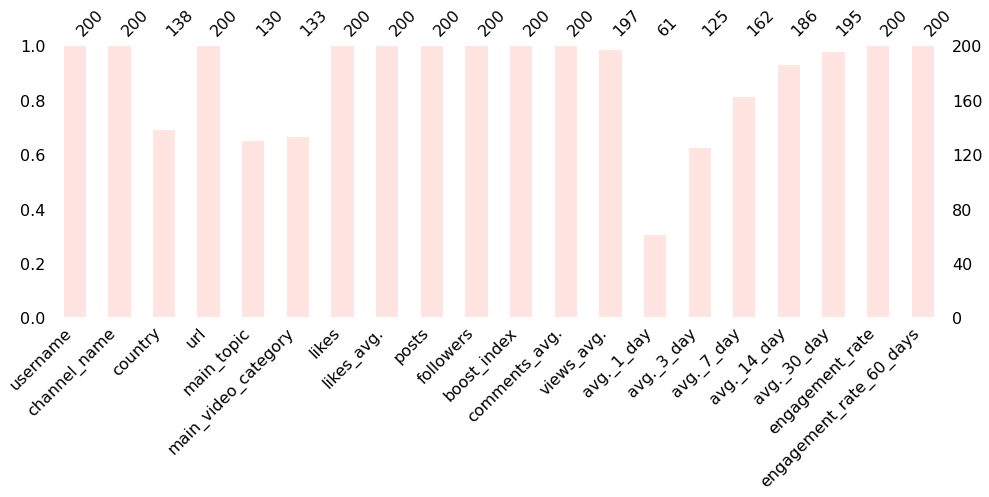

In [ ]:
msno.bar(data, figsize = (16,5),color = "#FFE4E1")
plt.show()

There are no gaps in the data. Let's check the data for the presence of categorical features.

In [ ]:
for column_name in data.columns:
    unique_values = len(data[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'username' has '200' unique values
Feature 'channel_name' has '200' unique values
Feature 'country' has '26' unique values
Feature 'url' has '200' unique values
Feature 'main_topic' has '19' unique values
Feature 'main_video_category' has '20' unique values
Feature 'likes' has '200' unique values
Feature 'likes_avg.' has '200' unique values
Feature 'posts' has '197' unique values
Feature 'followers' has '200' unique values
Feature 'boost_index' has '32' unique values
Feature 'comments_avg.' has '200' unique values
Feature 'views_avg.' has '198' unique values
Feature 'avg._1_day' has '55' unique values
Feature 'avg._3_day' has '119' unique values
Feature 'avg._7_day' has '156' unique values
Feature 'avg._14_day' has '180' unique values
Feature 'avg._30_day' has '189' unique values
Feature 'engagement_rate' has '200' unique values
Feature 'engagement_rate_60_days' has '200' unique values


In [ ]:
data.columns

Index(['username', 'channel_name', 'country', 'url', 'main_topic',
       'main_video_category', 'likes', 'likes_avg.', 'posts', 'followers',
       'boost_index', 'comments_avg.', 'views_avg.', 'avg._1_day',
       'avg._3_day', 'avg._7_day', 'avg._14_day', 'avg._30_day',
       'engagement_rate', 'engagement_rate_60_days'],
      dtype='object')

In [ ]:
country_df = data.country.value_counts().rename_axis('Country').reset_index(name='counts')

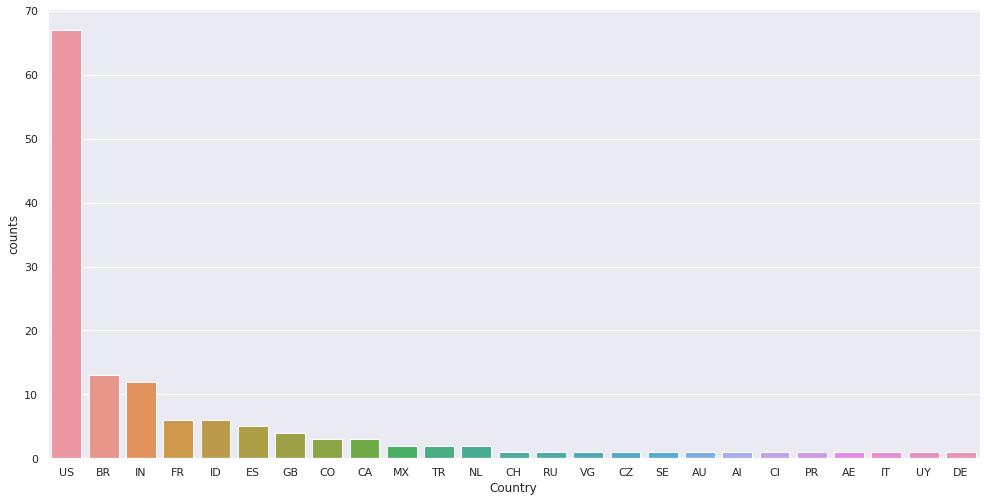

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(16.7,8.27)})
ax = sns.barplot(x="Country", y="counts", data=country_df)

The largest number of top bloggers are located in the USA. The reason for the greatest popularity of bloggers from the United States lies in the active socio-cultural position of this country, most of the stars of modern cinema live in the United States. India is in second place. The reason lies in the large population. The absence of China in this ranking is due to the high level of state censorship and the high prevalence of local social networks.

In [ ]:
data.head()

,username,channel_name,country,url,main_topic,main_video_category,likes,likes_avg.,posts,followers,boost_index,comments_avg.,views_avg.,avg._1_day,avg._3_day,avg._7_day,avg._14_day,avg._30_day,engagement_rate,engagement_rate_60_days
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


In [ ]:
data.main_topic.isnull().sum()

70

In [ ]:
data["main_topic"] = data["main_topic"].replace(0, 'Others')

In [ ]:
data["main_topic"].value_counts(dropna=False)

NaN                      70
Entertainment            22
Sports                   21
Gaming                   14
Music                    13
Trailers                  9
Fashion & Beauty          7
Movies                    6
Comedy                    6
Pets & Animals            5
Autos & Vehicles          5
Education                 4
Nonprofits & Activism     4
Travel & Events           4
Shows                     3
Film & Animation          2
Science & Technology      2
News & Politics           2
People & Blogs            1
Name: main_topic, dtype: int64

In [ ]:
entertainment_vc = data.main_topic.value_counts(normalize=True)

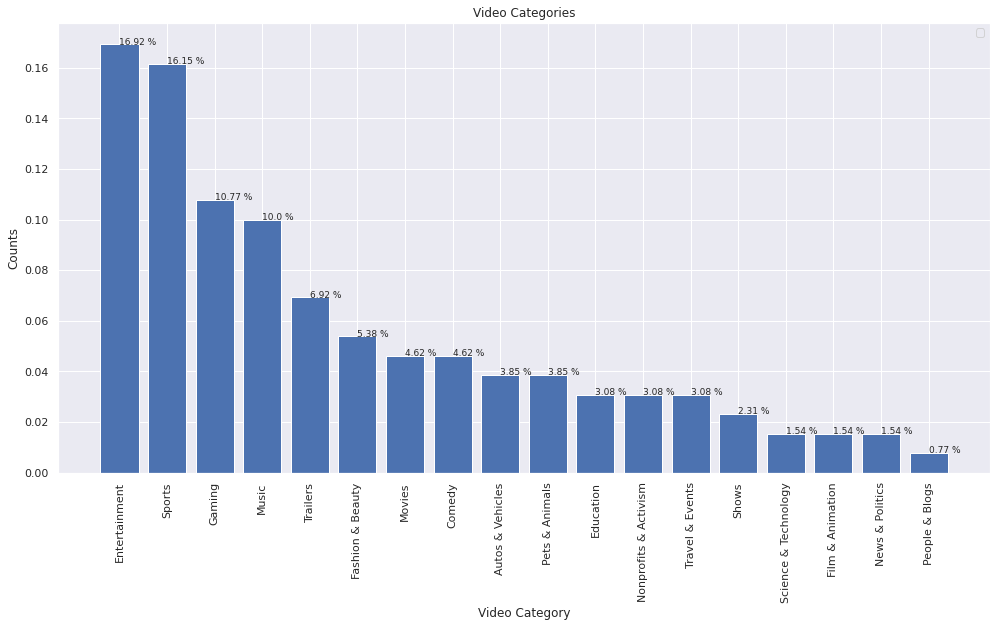

In [ ]:
plot_bar_for_vc(entertainment_vc, 'Video Category', 'Counts', 'Video Categories', 90)

If we are ignoring the missing values, from the above graph, we can see there is high reach for people who contribute of **Entertainment, Sports, Gamin and Music**, which counts to 53.84 % of all categories. 

In [ ]:
data.head()

,username,channel_name,country,url,main_topic,main_video_category,likes,likes_avg.,posts,followers,boost_index,comments_avg.,views_avg.,avg._1_day,avg._3_day,avg._7_day,avg._14_day,avg._30_day,engagement_rate,engagement_rate_60_days
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,NaN,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,NaN,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,NaN,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,NaN,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


In [ ]:
data.main_video_category = data["main_video_category"].replace(np.nan, 'Others')

In [ ]:
data.main_video_category.value_counts()

Others                   67
Entertainment            22
Sports                   21
Music                    14
Gaming                   14
Trailers                 10
Fashion & Beauty          7
Comedy                    6
Movies                    5
Autos & Vehicles          5
Pets & Animals            5
Nonprofits & Activism     4
Education                 4
Travel & Events           4
Shows                     3
Film & Animation          2
Science & Technology      2
Gaming & Apps             2
News & Politics           2
People & Blogs            1
Name: main_video_category, dtype: int64

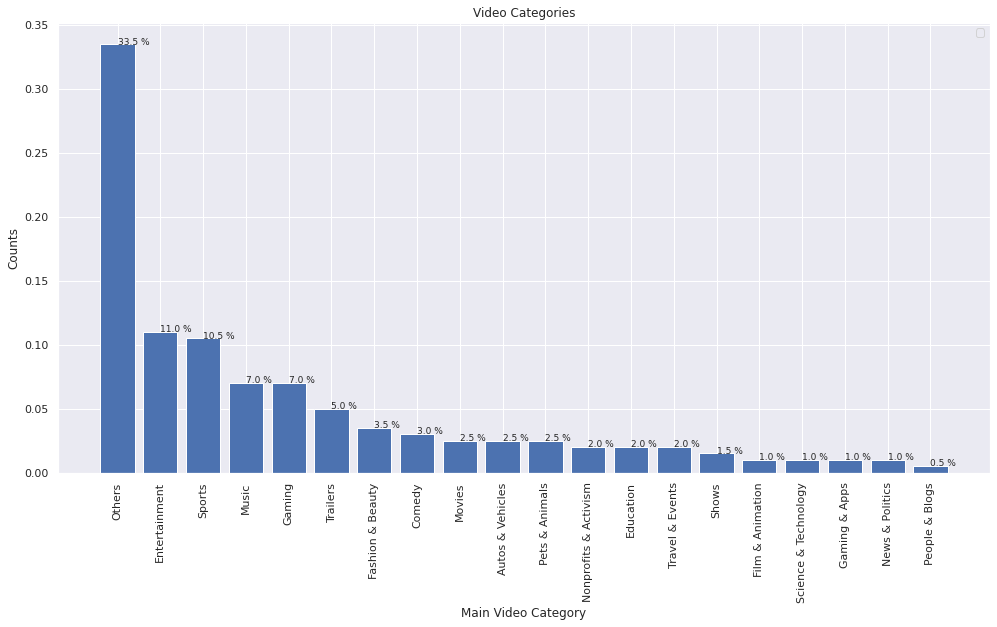

In [ ]:
main_video_category_vc = data.main_video_category.value_counts(normalize=True)
plot_bar_for_vc(main_video_category_vc, 'Main Video Category', 'Counts', 'Video Categories', 90)

In [ ]:
data.head()

,username,channel_name,country,url,main_topic,main_video_category,likes,likes_avg.,posts,followers,boost_index,comments_avg.,views_avg.,avg._1_day,avg._3_day,avg._7_day,avg._14_day,avg._30_day,engagement_rate,engagement_rate_60_days
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,Others,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,Others,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,Others,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,Others,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


In [ ]:
data.columns

Index(['username', 'channel_name', 'country', 'url', 'main_topic',
       'main_video_category', 'likes', 'likes_avg.', 'posts', 'followers',
       'boost_index', 'comments_avg.', 'views_avg.', 'avg._1_day',
       'avg._3_day', 'avg._7_day', 'avg._14_day', 'avg._30_day',
       'engagement_rate', 'engagement_rate_60_days'],
      dtype='object')

In [ ]:
num_features=['likes', 'likes_avg.', 'posts','followers', 'boost_index', 'comments_avg.', 'views_avg.', 'avg._1_day',
       'avg._3_day', 'avg._7_day', 'avg._14_day', 'avg._30_day', 'engagement_rate', 'engagement_rate_60_days']

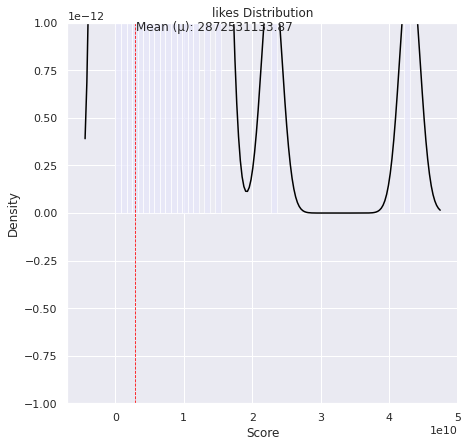

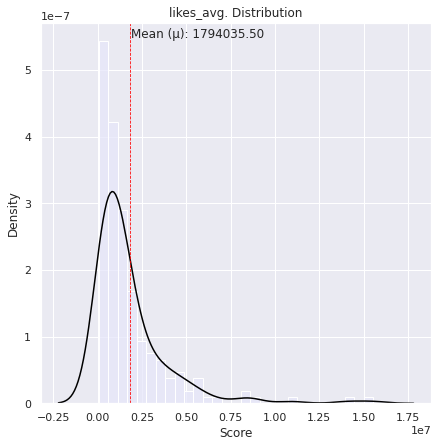

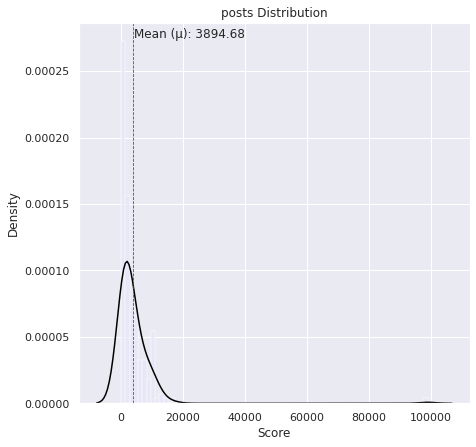

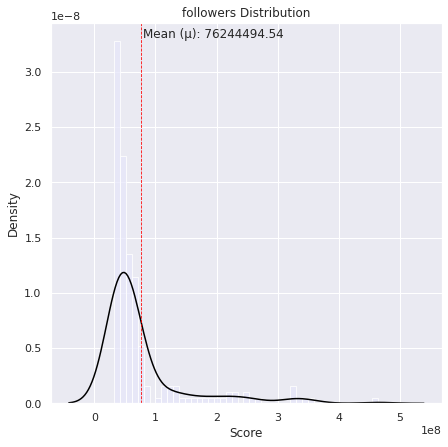

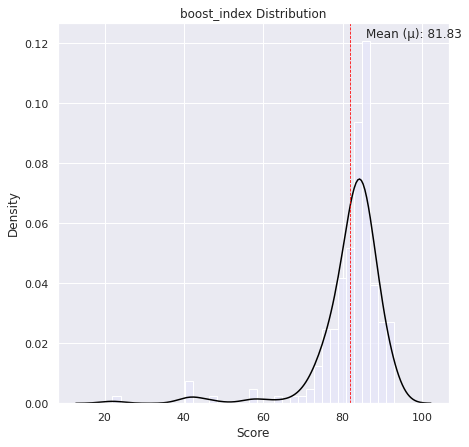

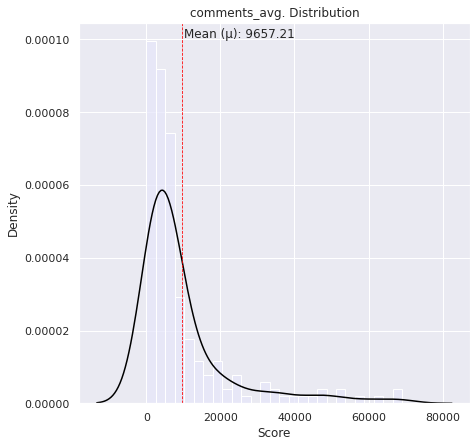

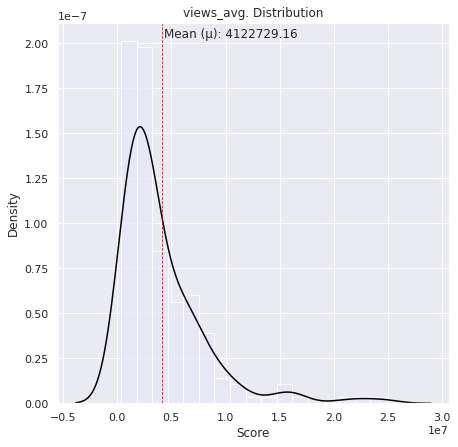

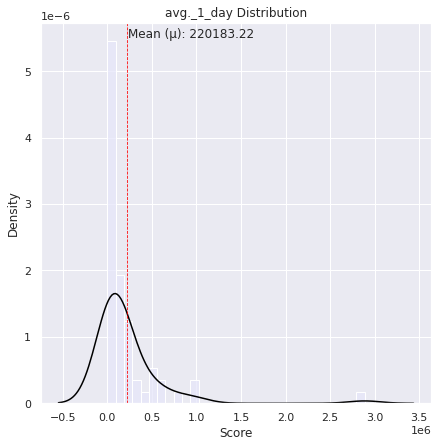

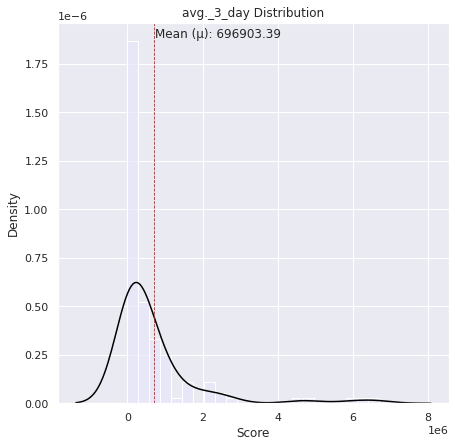

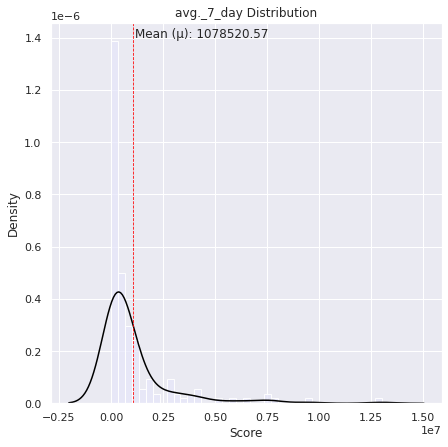

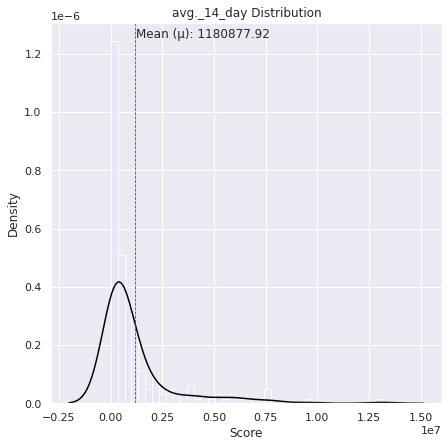

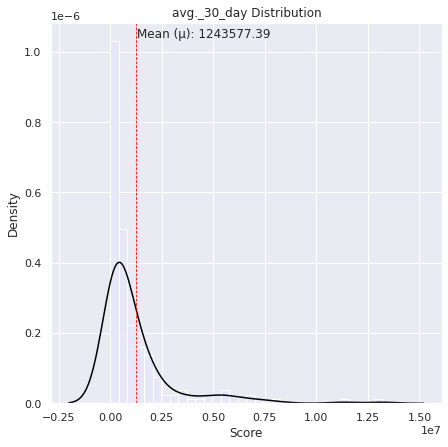

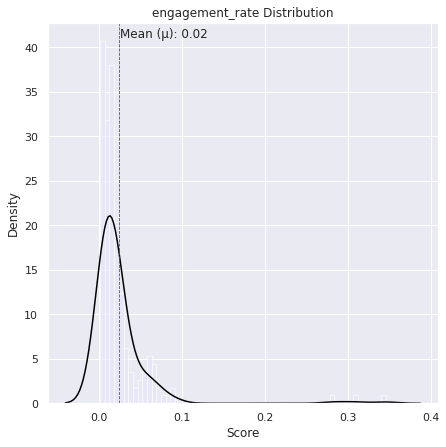

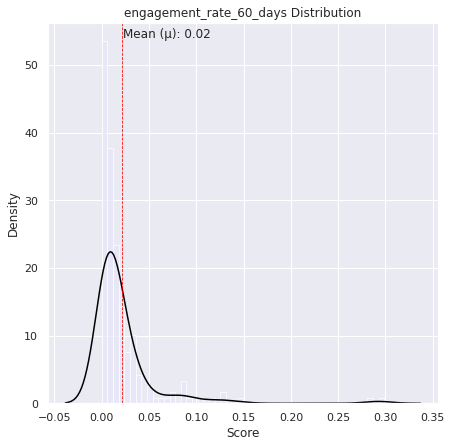

In [ ]:
for column_name in num_features:
    plt.figure(figsize=(7, 7))
    plt.title("{column_name} Distribution".format(column_name = column_name))
    sns.histplot(data[column_name], stat='density',color='#E6E6FA')
    sns.kdeplot(data[column_name], color='black')
    plt.axvline(data[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
    min_ylim, max_ylim = plt.ylim()
    plt.text(data[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(data[column_name].mean()))
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.show()

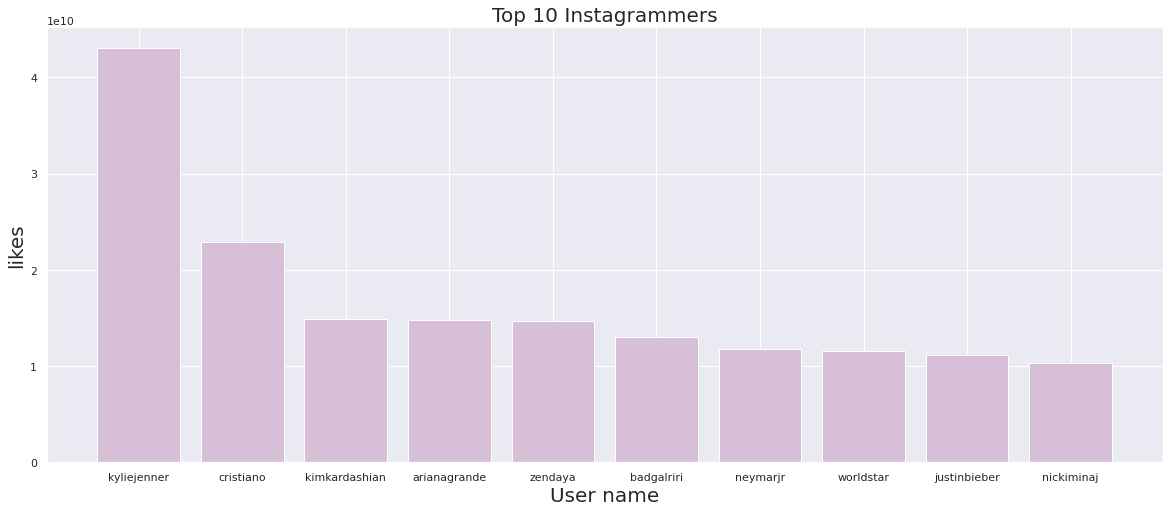

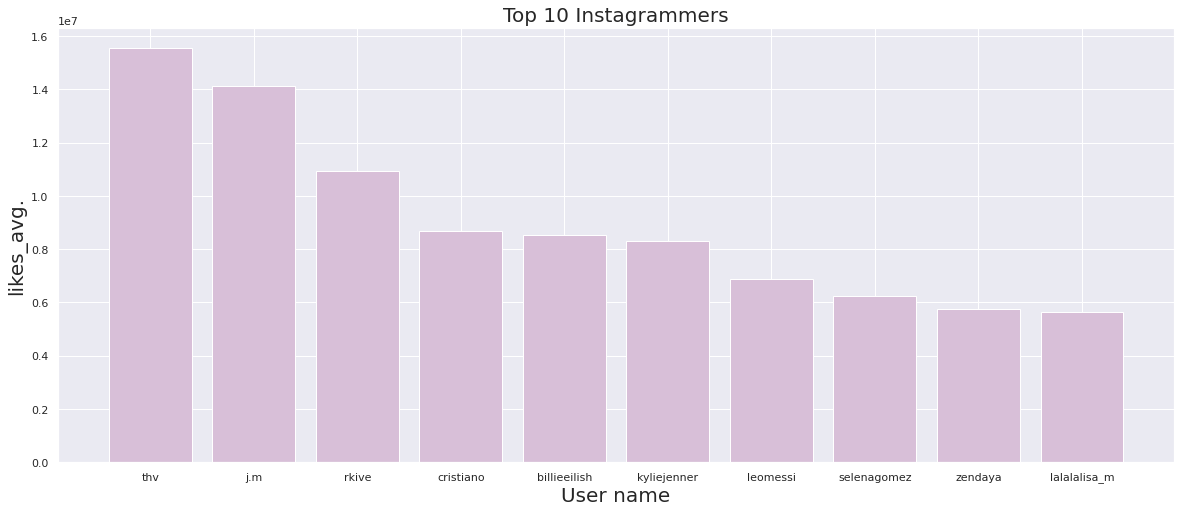

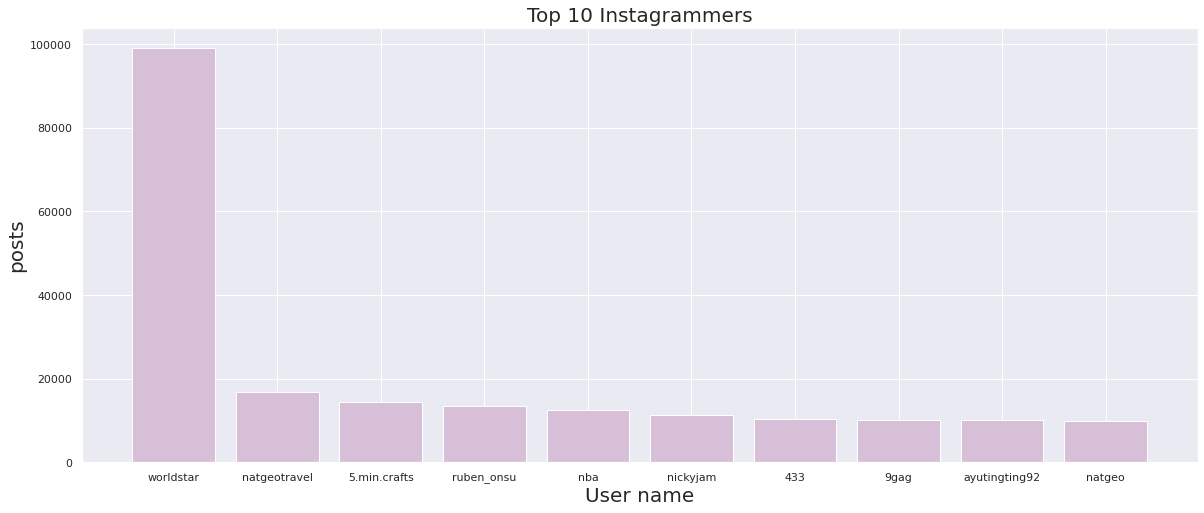

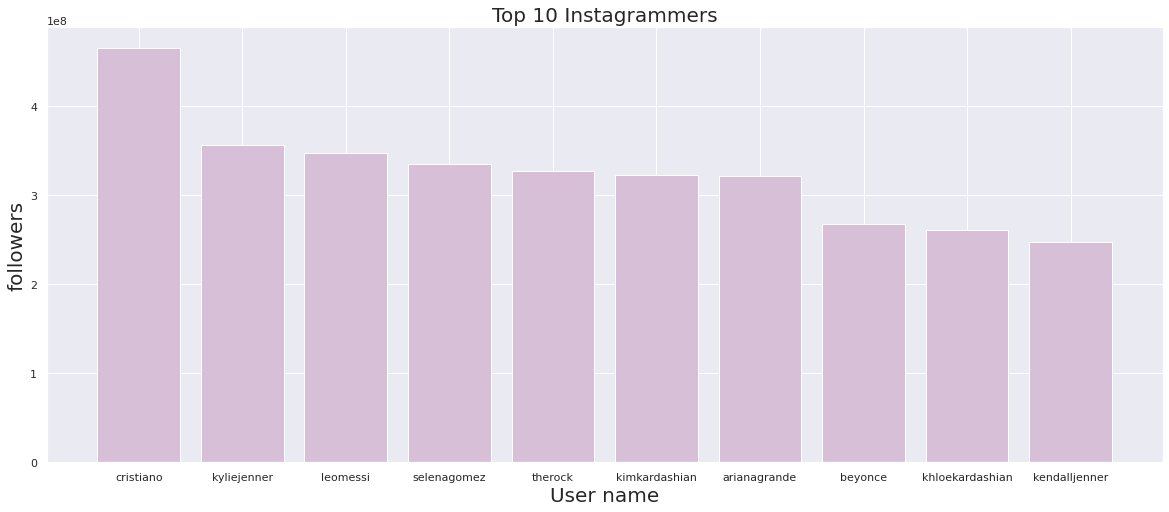

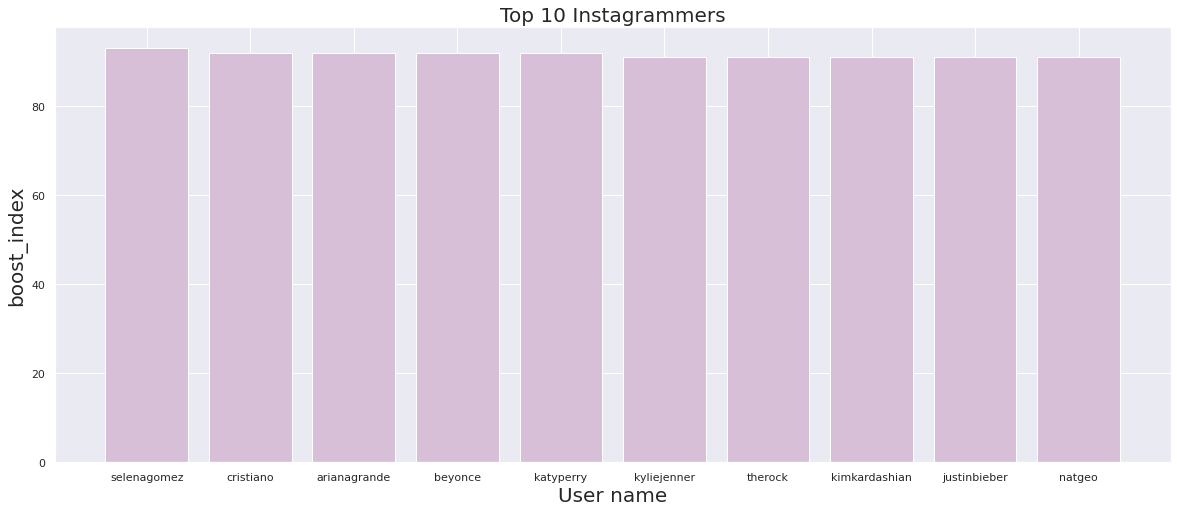

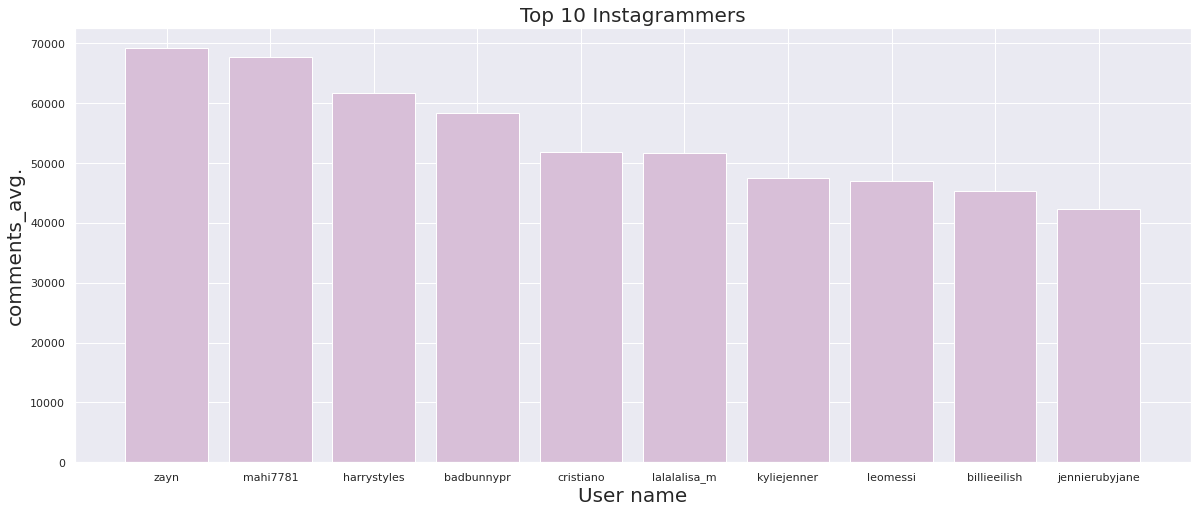

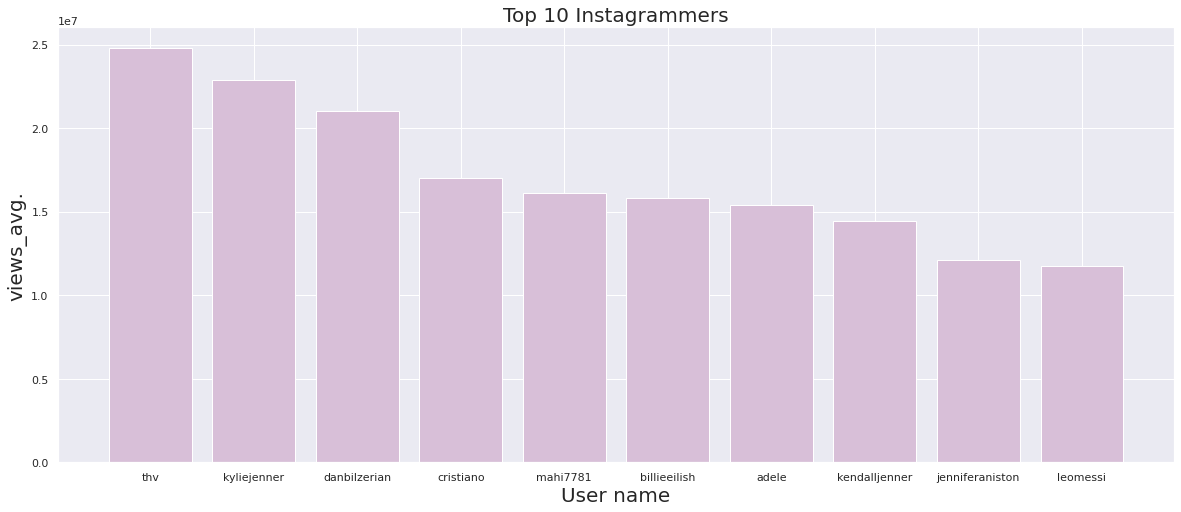

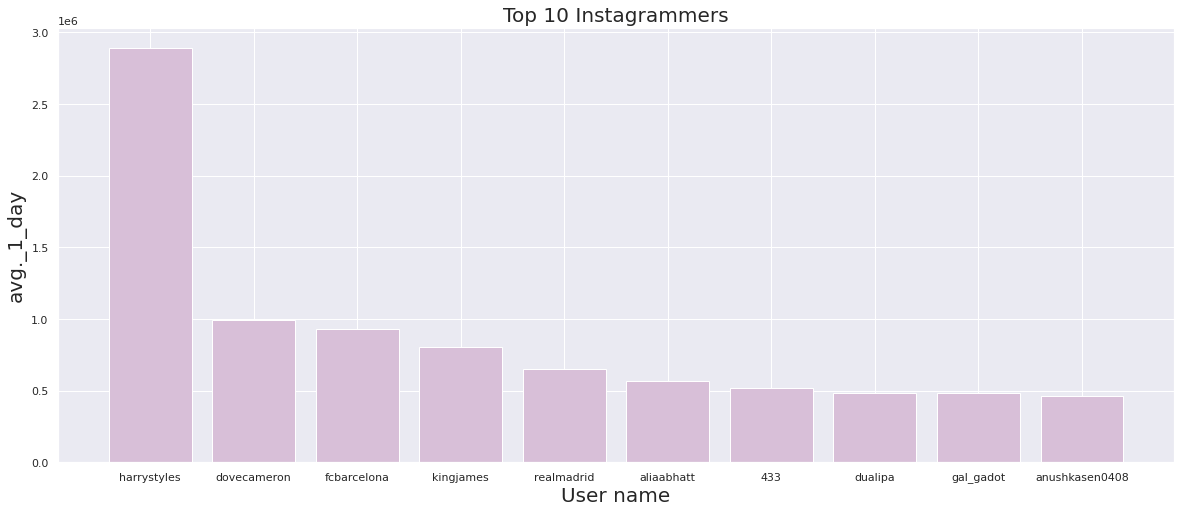

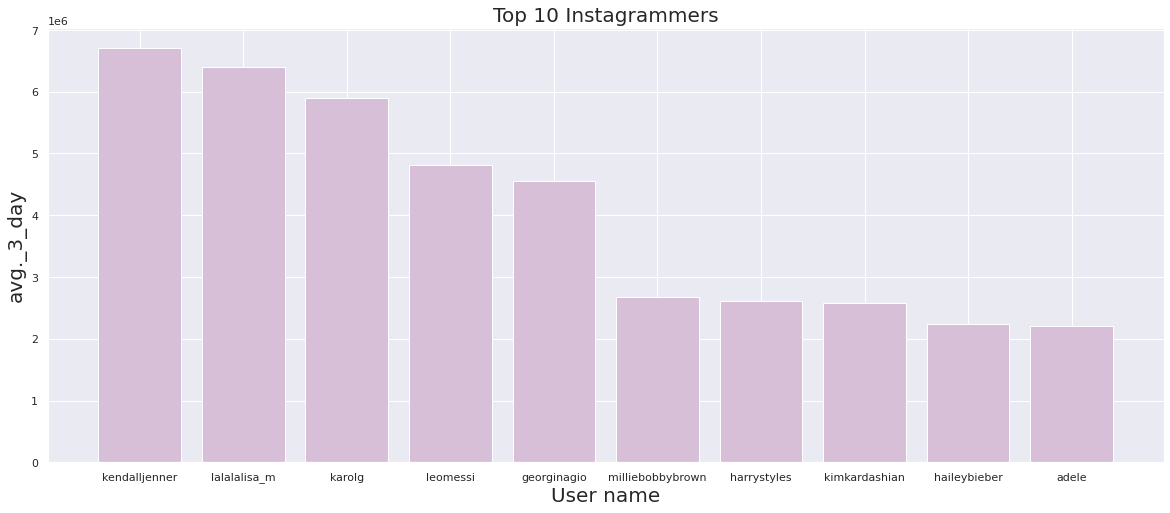

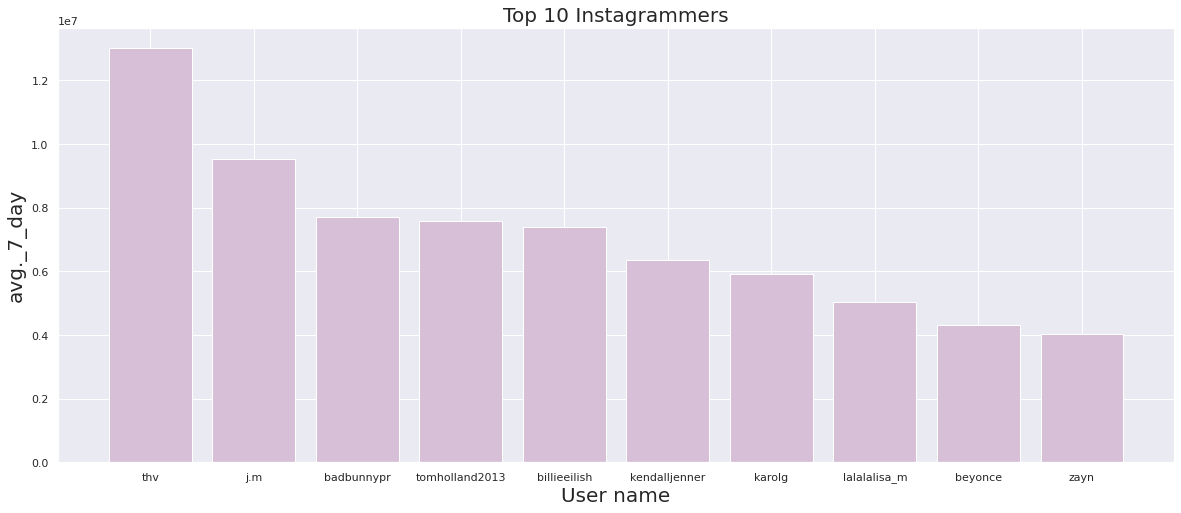

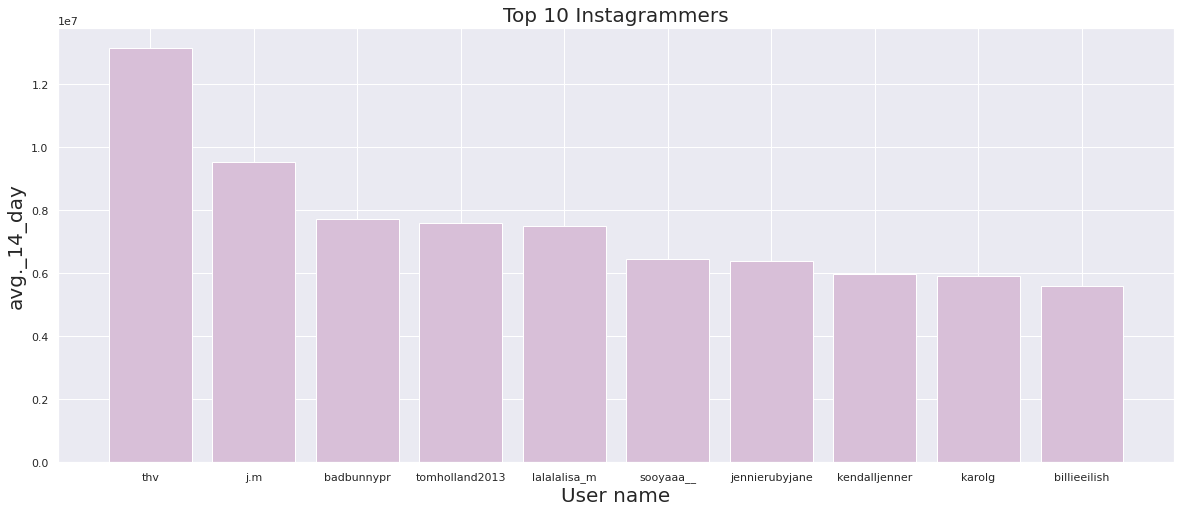

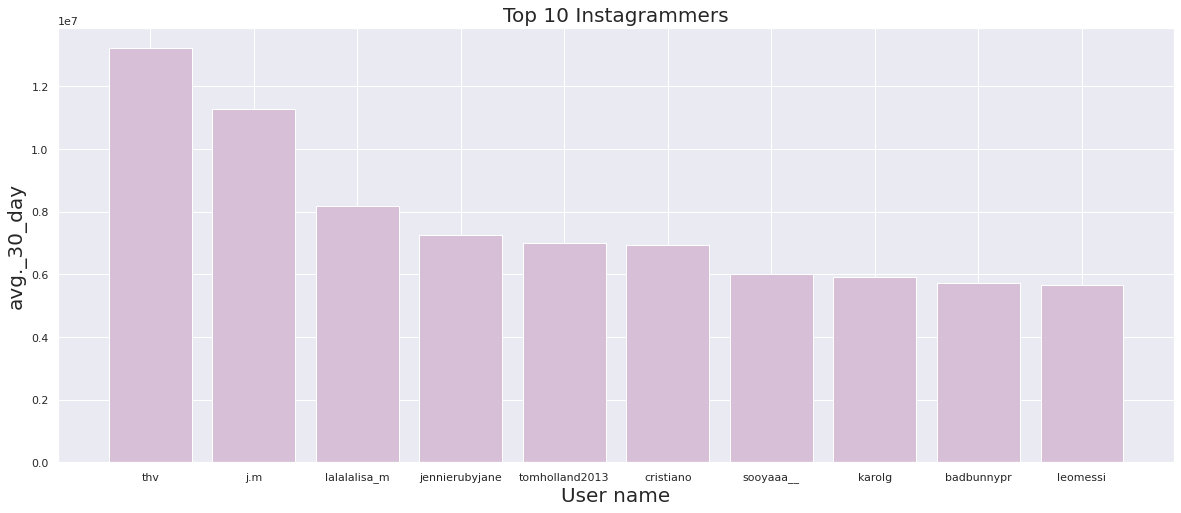

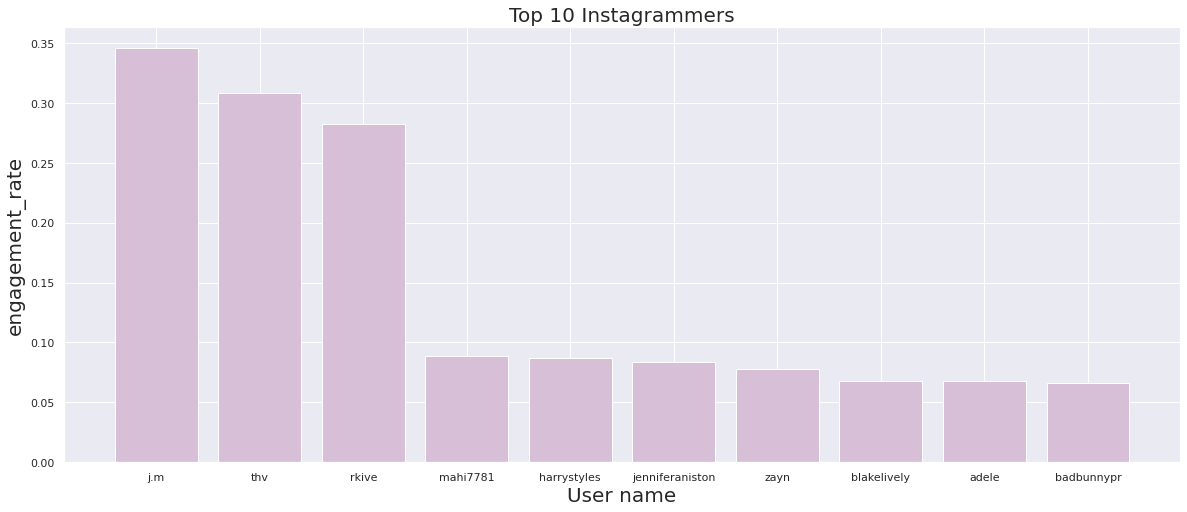

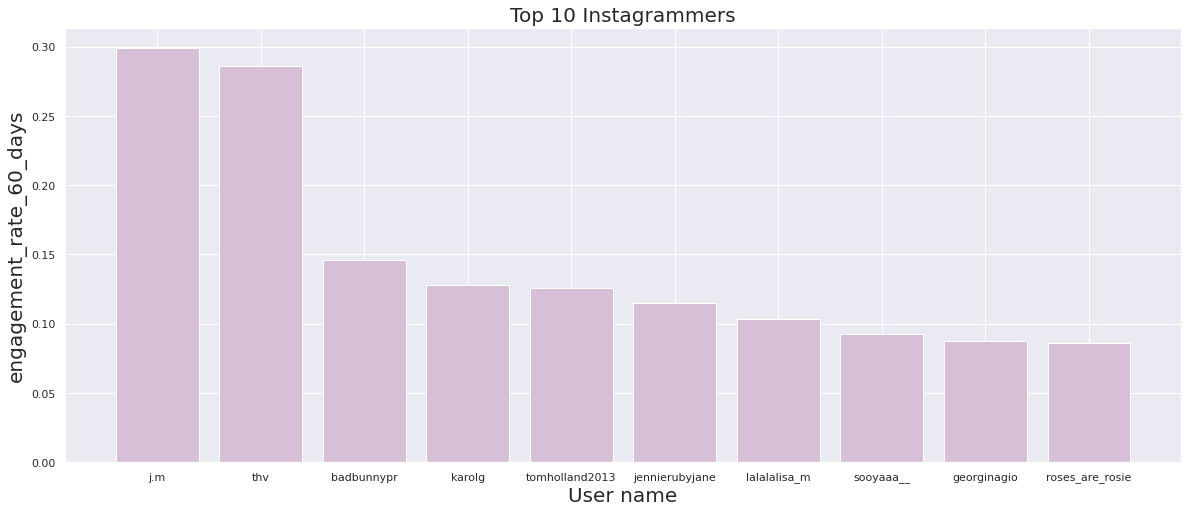

In [ ]:
for column in num_features:
    top10 = data.nlargest(10,column)
    plt.figure(figsize=(20,8))
    plt.bar(top10['username'], top10[column],color='#D8BFD8')
    plt.ylabel(column, fontsize = 20)
    plt.xlabel("User name", fontsize = 20)
    plt.title("Top 10 Instagrammers", fontsize = 20)

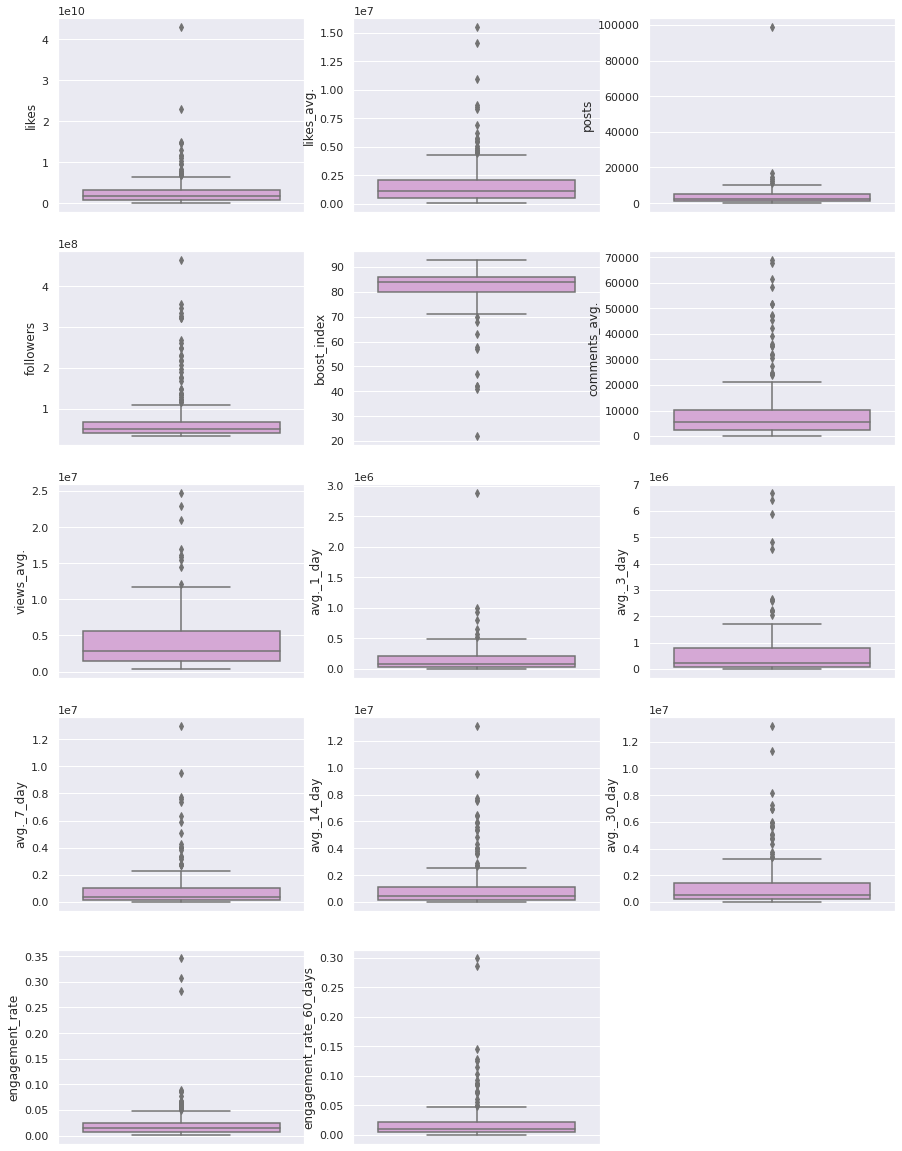

In [ ]:
i=1
plt.figure(figsize=(15,25))
for feature in num_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=data[feature],color='#DDA0DD')
    i+=1


In [ ]:
num_features=['likes', 'posts','followers', 'boost_index', 'comments_avg.', 'views_avg.','engagement_rate']

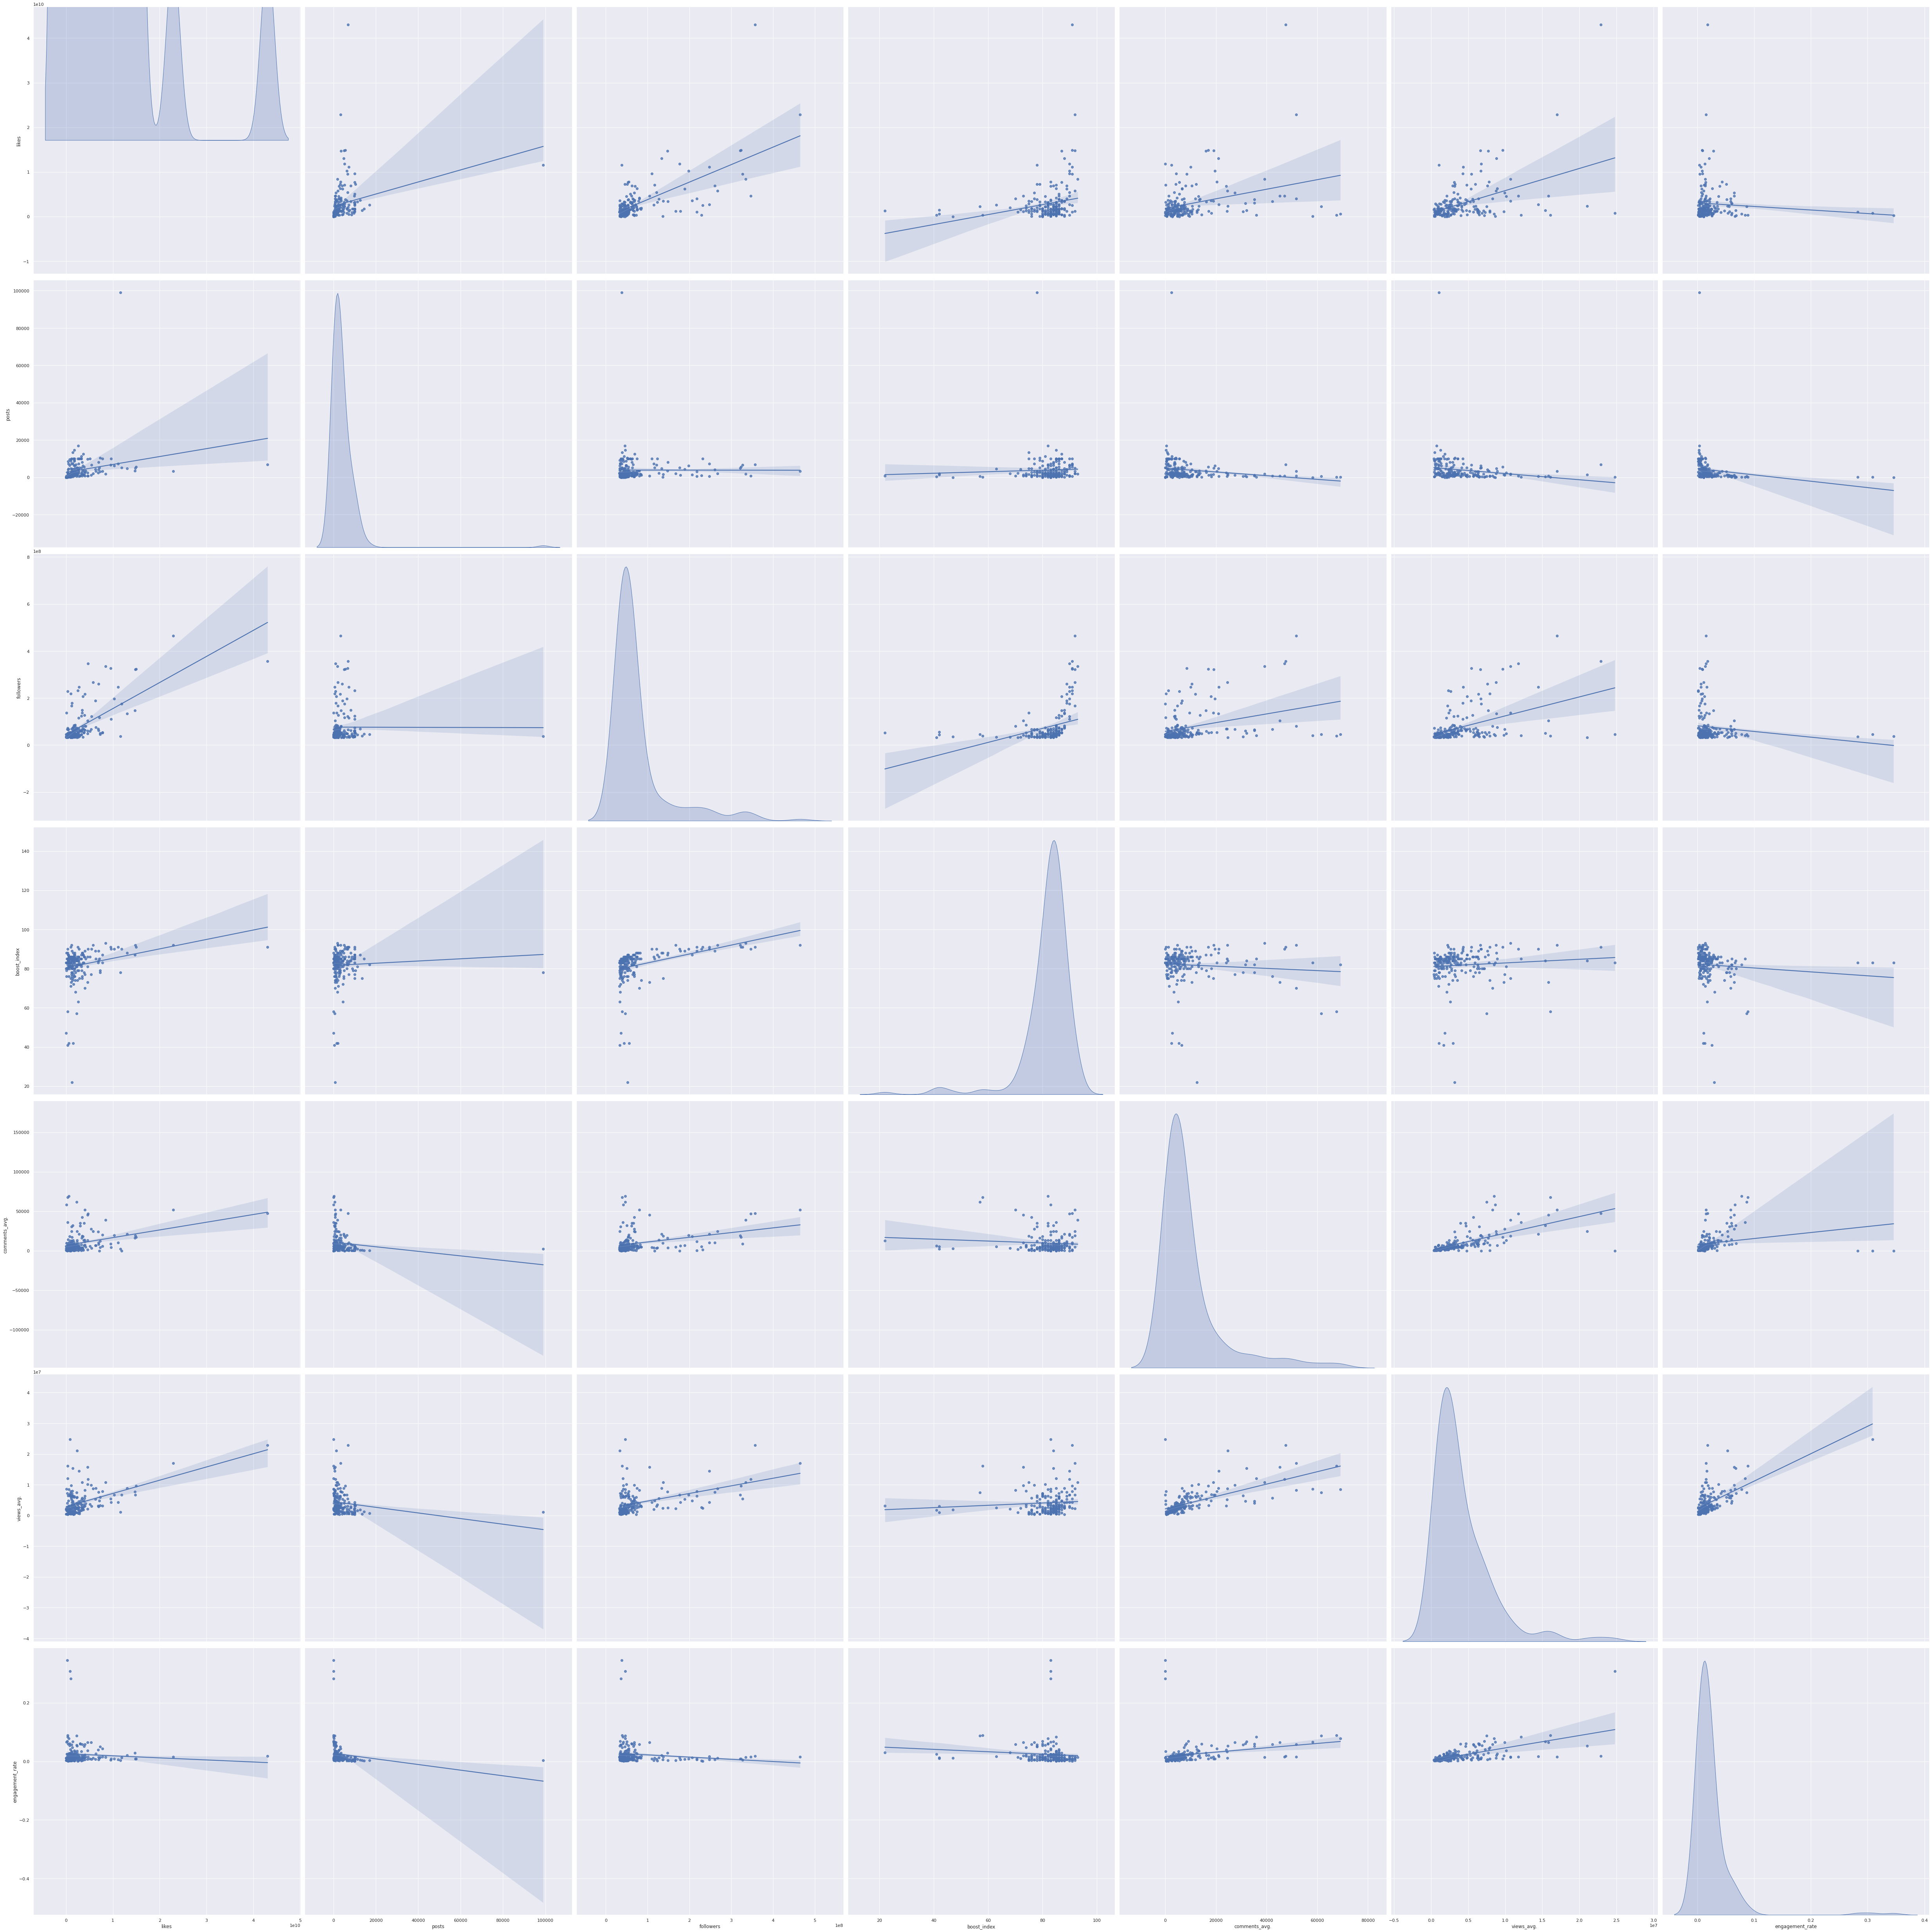

In [ ]:
sns.set()
sns.pairplot(data[num_features],height = 10 ,kind ='reg',diag_kind='kde')
plt.show()

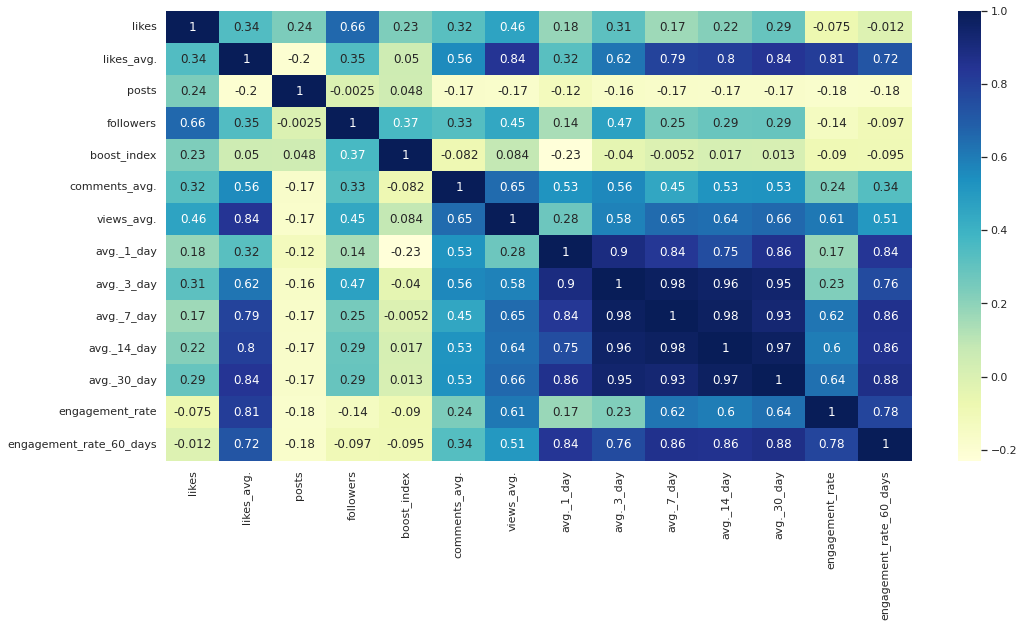

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

### Some Questions in mind 

1. What is the country wise distribution of top influencers ?
2. Does number of posts helpful to reach top ?
3. How engagement rate is related to likes ?
4. Which category is having more views ?
5. How category is related with followers ?


### 1. What is the country wise distribution of top influencers ?

In [ ]:
country_vc = data.country.value_counts(normalize=True)

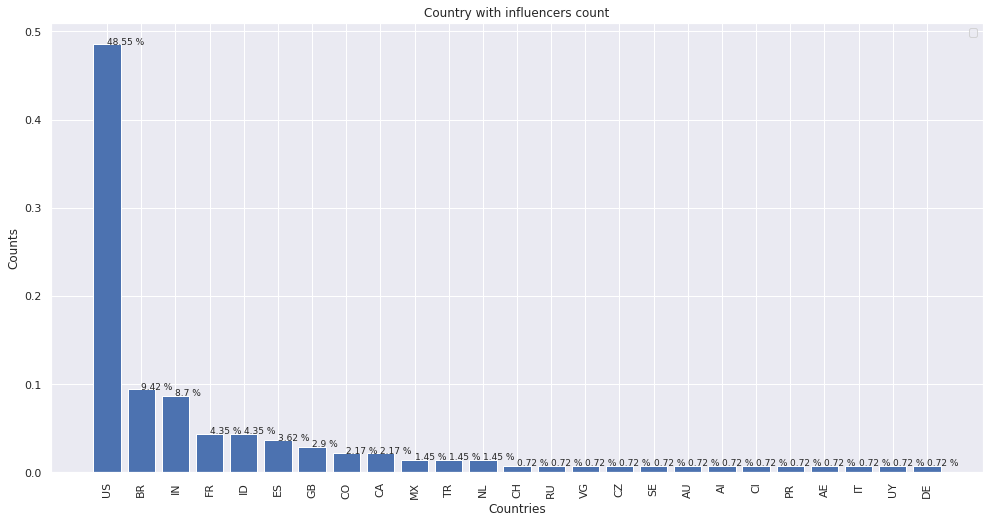

In [ ]:
plot_bar_for_vc(country_vc, 'Countries', 'Counts', 'Country with influencers count', 90)

In [ ]:
data.main_topic = np.where(data.main_topic == np.nan, 'Others', data.main_topic)


In [ ]:
data.main_topic.isnull().sum()

70

Category wise separation in each country based on main_topic 

In [ ]:
res = data.groupby('country')['main_topic'].value_counts()

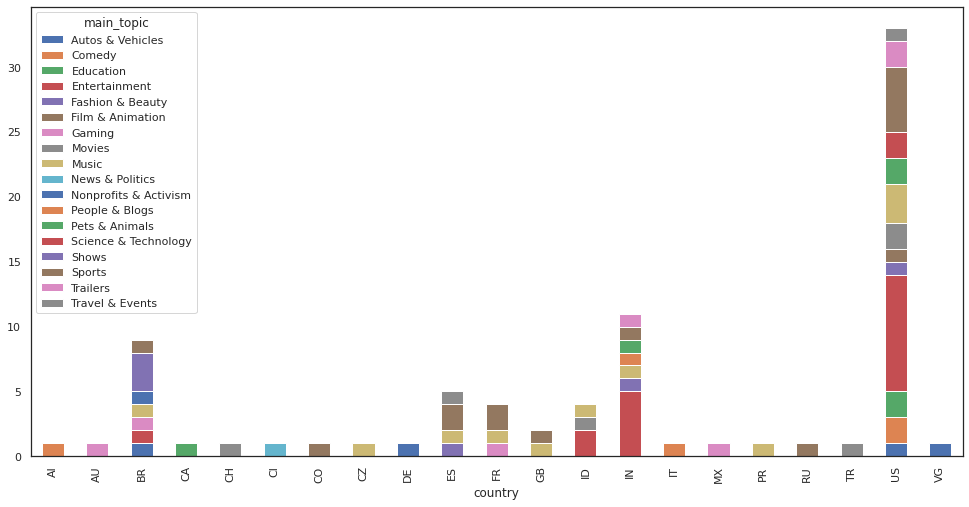

In [ ]:
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
res.unstack().plot(kind='bar', stacked=True)

From the above graph, we can see people from us are having the more influences in all domains 

### 2. Does number of posts helpful to reach top ?

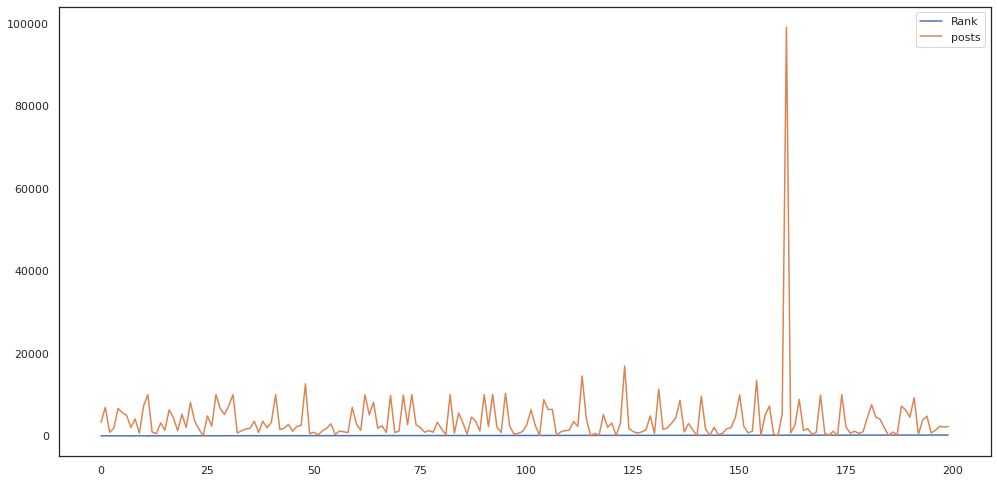

In [ ]:
data.posts.rename_axis('Rank').reset_index(name='posts').plot()

from the above graph, we can see that no. of posts is not related to ranks. Even the person at around 160 is having higher number of posts close to 1lakh, but the person the top is having less than 5k posts. 

### 3. How engagement rate is related to likes ?

In [ ]:
data.head()

,username,channel_name,country,url,main_topic,main_video_category,likes,likes_avg.,posts,followers,boost_index,comments_avg.,views_avg.,avg._1_day,avg._3_day,avg._7_day,avg._14_day,avg._30_day,engagement_rate,engagement_rate_60_days
0,cristiano,cristiano,ES,https://www.instagram.com/cristiano,Sports,Sports,2.287645e+10,8.671953e+06,3328,465027234,92,51758.330927,1.700949e+07,NaN,NaN,3321113.0,5.327340e+06,6.948659e+06,0.014916,0.015903
1,kyliejenner,kyliejenner,US,https://www.instagram.com/kyliejenner,NaN,Others,4.304855e+10,8.296736e+06,6921,356687629,91,47534.120961,2.287547e+07,NaN,NaN,1223002.0,2.196528e+06,4.692459e+06,0.017617,0.016189
2,leomessi,leomessi,NaN,https://www.instagram.com/leomessi,NaN,Others,4.670492e+09,6.895178e+06,875,347032978,90,47044.540305,1.176160e+07,NaN,4810554.0,3199807.0,5.359469e+06,5.668454e+06,0.015534,0.019045
3,selenagomez,selenagomez,US,https://www.instagram.com/selenagomez,NaN,Others,8.442643e+09,6.252711e+06,1835,334551681,93,39167.115727,1.072397e+07,NaN,NaN,NaN,2.340219e+06,2.340219e+06,0.013913,0.007720
4,therock,therock,US,https://www.instagram.com/therock,NaN,Others,9.562231e+09,1.874151e+06,6660,327064138,91,8529.747043,5.413831e+06,NaN,NaN,713970.0,1.101339e+06,1.165227e+06,0.004426,0.003723


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data[['likes', 'engagement_rate']])
normalized_df = pd.DataFrame(x_scaled, columns=['likes', 'engagement_rate'])

In [ ]:
normalized_df

,likes,engagement_rate
0,0.531301,0.040115
1,1.000000,0.047954
2,0.108285,0.041908
3,0.195931,0.037204
4,0.221944,0.009675
...,...,...
195,0.002371,0.011487
196,0.054504,0.150737
197,0.031471,0.049036
198,0.023922,0.041104


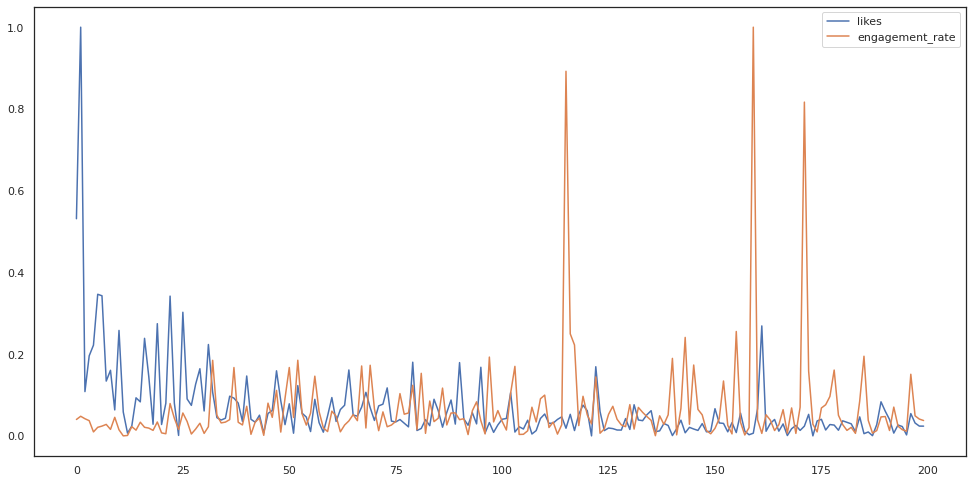

In [ ]:
normalized_df[['likes', 'engagement_rate']].plot()


In [ ]:
normalized_df.corr()

,likes,engagement_rate
likes,1.000000,-0.074829
engagement_rate,-0.074829,1.000000


Surprisingly higher engagement rate is contributing a very little much to the likes. 

### 4. Which category is having more views ?

In [ ]:
new_df = data[['views_avg.', 'main_topic']]

In [ ]:
new_df.main_topic.replace(np.nan, 'Others', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
new_df['views_avg.'] = preprocessing.MinMaxScaler().fit_transform(new_df[['views_avg.']])

<ipython-input-61-732fd285c429>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['views_avg.'] = preprocessing.MinMaxScaler().fit_transform(new_df[['views_avg.']])


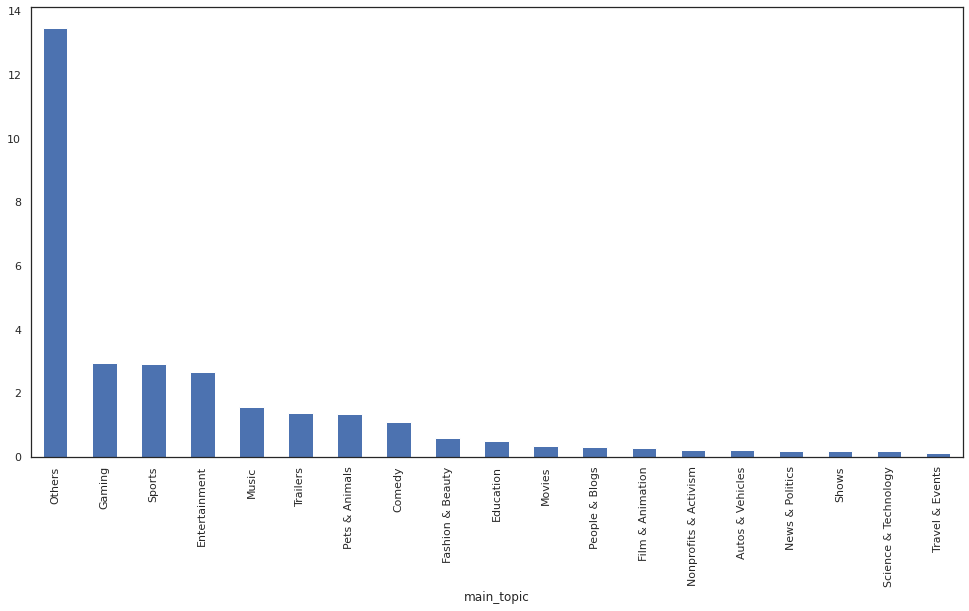

In [ ]:
new_df.groupby('main_topic')['views_avg.'].sum().sort_values(ascending=False).plot(kind='bar')

As we can see from the above graph, categories on gaming, sports, entertainment is having more views than the other. 

### 5. How category is related with followers ?

<ipython-input-63-475ad7f1c9e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['followers'] = preprocessing.MinMaxScaler().fit_transform(new_df[['followers']])


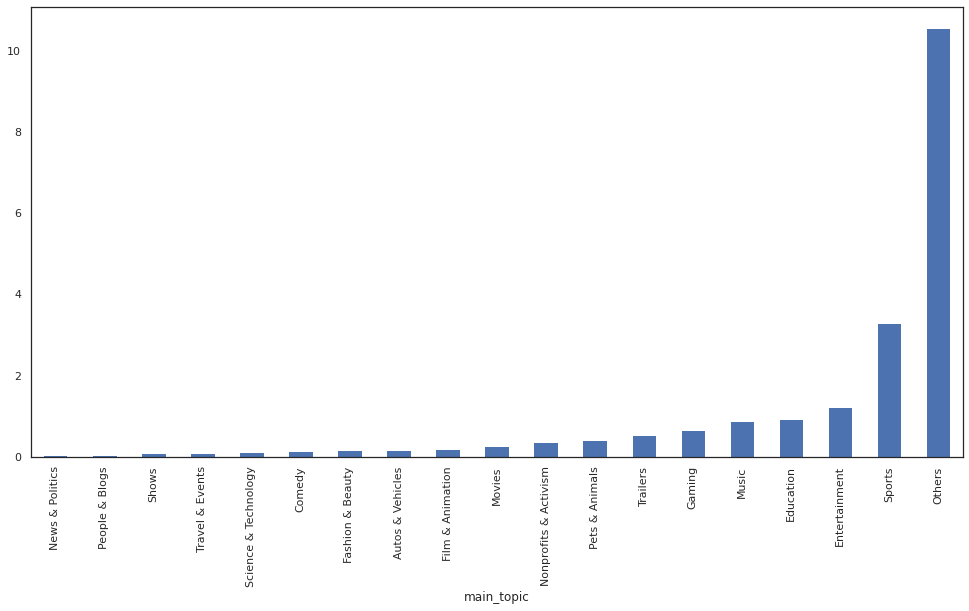

In [ ]:
data.main_topic.replace(np.nan, 'Others', inplace=True)
new_df = data[['main_topic', 'followers']]
new_df['followers'] = preprocessing.MinMaxScaler().fit_transform(new_df[['followers']])
new_df.groupby('main_topic').followers.sum().sort_values().plot(kind='bar')


From the above graph, we can see the categories on Sports, Entertainment, Music and Gaming is having more followers. 

Thanks for viewing my kernel, give suggestions to improve. Let's ask questions together to the data. 